In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_all = pd.read_csv("data/first data.csv")
df_all.shape

(120, 23)

In [4]:
df = df_all.drop('Questionnaire Number',axis=1)
df.drop('human-resources-actor',axis=1, inplace=True)
df.drop('technology-actor',axis=1, inplace=True)
df.drop('regulation-actor',axis=1, inplace=True)
df.drop('administrative-dimension-actor',axis=1, inplace=True)
df.drop('external-users',axis=1, inplace=True)
df.drop('state-institution',axis=1, inplace=True)
df.drop('scientific-community',axis=1, inplace=True)
df.drop('professional-association',axis=1, inplace=True)
# df.drop('economic-actor',axis=1, inplace=True)
df.drop('technical-dimension',axis=1, inplace=True)
df.drop('political-social',axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
sex                                      120 non-null int64
education                                120 non-null int64
field                                    120 non-null int64
background                               120 non-null int64
history in middle management             120 non-null int64
History on the post of top executives    120 non-null int64
age                                      120 non-null int64
Job                                      120 non-null int64
Duration-information-system              120 non-null int64
Time-information-system                  120 non-null int64
familiarity-information-system           120 non-null int64
economic-actor                           120 non-null int64
dtypes: int64(12)
memory usage: 11.3 KB


In [6]:
X = df.drop("economic-actor", axis = 1)
y = df["economic-actor"]

In [7]:
X.shape

(120, 11)

In [8]:
y.shape

(120,)

In [9]:
X.head()

,sex,education,field,background,history in middle management,History on the post of top executives,age,Job,Duration-information-system,Time-information-system,familiarity-information-system
0,1,5,1,1,1,1,1,1,1,1,1
1,1,2,1,1,1,1,1,1,1,1,1
2,1,2,1,1,1,1,1,1,1,1,1
3,1,2,1,2,1,1,1,1,1,1,2
4,1,3,1,2,2,1,1,1,2,1,2


___
## Gradient Boosting Classifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 11), (90,), (30, 11), (30,))

In [11]:
params = {'n_estimators': 1500, 'max_depth': 5, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

clf = GradientBoostingClassifier(**params)

In [12]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

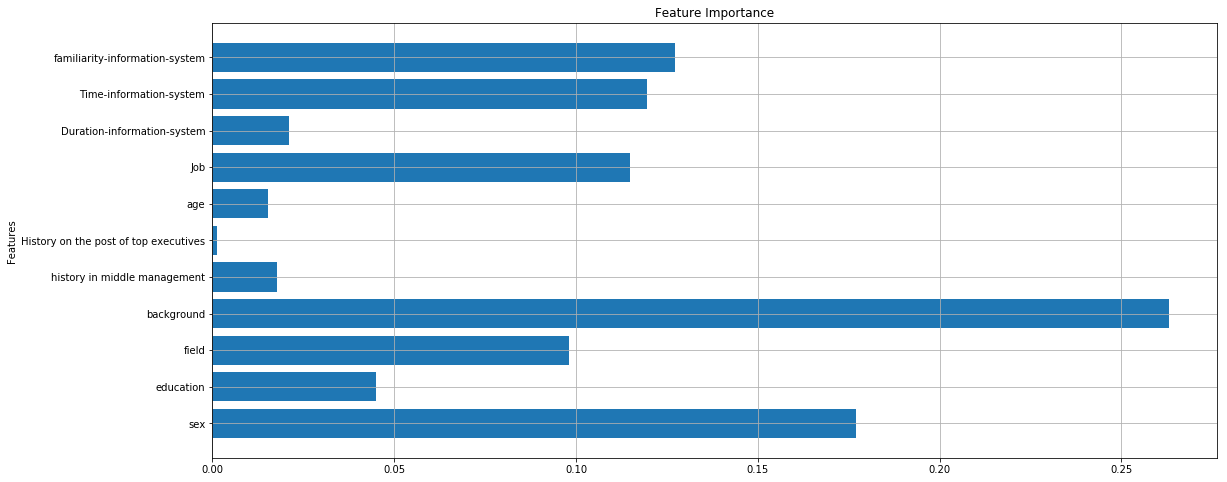

In [13]:
# display the relative importance of each attribute
plt.figure(figsize=(18,8))
relval = clf.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(11) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ("sex", "education", "field", "background", "history in middle management", 
                 "History on the post of top executives", "age", "Job", "Duration-information-system", 
                 "Time-information-system", "familiarity-information-system"))
plt.grid(True)

In [14]:
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [15]:
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", clf.score(X_test, y_test))

correct: 25
incorrect: 5
accuracy score: 0.8333333333333334


In [16]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[4 1 0 0 0]
 [1 5 1 0 0]
 [0 0 7 0 0]
 [0 0 0 3 2]
 [0 0 0 0 6]]
0.8333333333333334


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.83      0.71      0.77         7
           3       0.88      1.00      0.93         7
           4       1.00      0.60      0.75         5
           5       0.75      1.00      0.86         6

   micro avg       0.83      0.83      0.83        30
   macro avg       0.85      0.82      0.82        30
weighted avg       0.85      0.83      0.83        30

